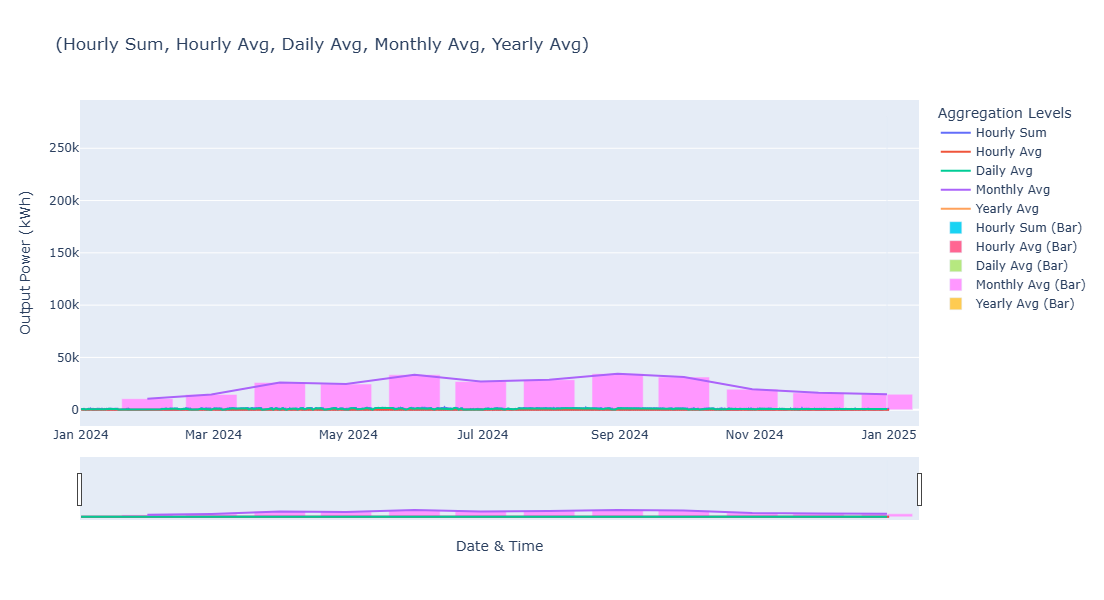

In [3]:

import pandas as pd
import plotly.graph_objects as go

file_path = "grid.csv"
df = pd.read_csv(file_path)

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df.set_index('DateTime', inplace=True)
df_5min_sum = df['Output_power_kW'].resample('5min').sum()
hourly_sum = df_5min_sum.resample('h').sum()

hourly_avg = hourly_sum.resample('h').mean() / 12

daily_avg = hourly_avg.resample('D').sum()

monthly_avg = daily_avg.resample('ME').sum()

yearly_avg = monthly_avg.resample('YE').sum()
aggregated_data = pd.DataFrame({
    'Hourly Sum': hourly_sum,
    'Hourly Avg': hourly_avg,
    'Daily Avg': daily_avg,
    'Monthly Avg': monthly_avg,
    'Yearly Avg': yearly_avg
}).reset_index()

fig = go.Figure(layout=go.Layout(height=600, width=1000))


fig.add_trace(go.Scatter(x=hourly_sum.index, y=hourly_sum, mode='lines', name='Hourly Sum'))
fig.add_trace(go.Scatter(x=hourly_avg.index, y=hourly_avg, mode='lines', name='Hourly Avg'))
fig.add_trace(go.Scatter(x=daily_avg.index, y=daily_avg, mode='lines', name='Daily Avg'))
fig.add_trace(go.Scatter(x=monthly_avg.index, y=monthly_avg, mode='lines', name='Monthly Avg'))
fig.add_trace(go.Scatter(x=yearly_avg.index, y=yearly_avg, mode='lines', name='Yearly Avg'))

fig.add_trace(go.Bar(x=hourly_sum.index, y=hourly_sum, name='Hourly Sum (Bar)'))
fig.add_trace(go.Bar(x=hourly_avg.index, y=hourly_avg, name='Hourly Avg (Bar)'))
fig.add_trace(go.Bar(x=daily_avg.index, y=daily_avg, name='Daily Avg (Bar)'))
fig.add_trace(go.Bar(x=monthly_avg.index, y=monthly_avg, name='Monthly Avg (Bar)'))
fig.add_trace(go.Bar(x=yearly_avg.index, y=yearly_avg, name='Yearly Avg (Bar)'))

fig.update_layout(
    title="(Hourly Sum, Hourly Avg, Daily Avg, Monthly Avg, Yearly Avg)",
    xaxis_title="Date & Time",
    yaxis_title="Output Power (kWh)",
    barmode='overlay',
    legend_title="Aggregation Levels",
    xaxis_rangeslider_visible=True
)

fig.show()

aggregated_data.to_csv("averaged_data.csv", index=False)

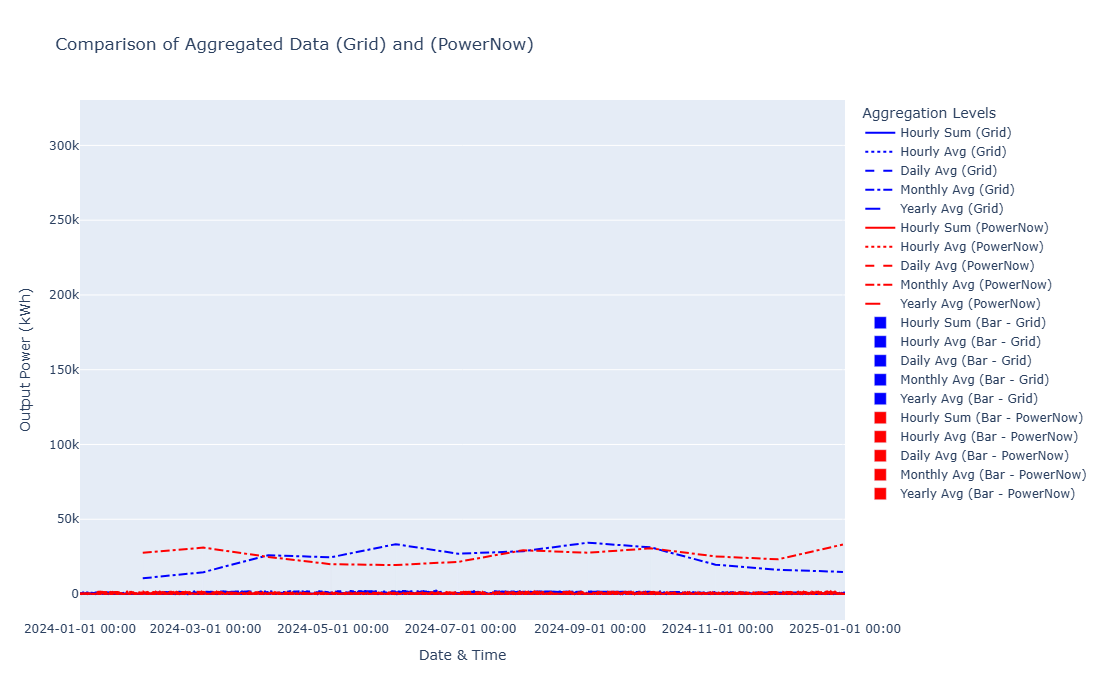

In [15]:
import pandas as pd
import plotly.graph_objects as go

file_path1 = "grid.csv"
df1 = pd.read_csv(file_path1)

df1['DateTime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'])
df1.set_index('DateTime', inplace=True)

df1_5min_sum = df1['Output_power_kW'].resample('5min').sum()
hourly_sum1 = df1_5min_sum.resample('h').sum()
hourly_avg1 = hourly_sum1.resample('h').mean() / 12
daily_avg1 = hourly_avg1.resample('D').sum()
monthly_avg1 = daily_avg1.resample('ME').sum()
yearly_avg1 = monthly_avg1.resample('YE').sum()

aggregated_data1 = pd.DataFrame({
    'Hourly Sum': hourly_sum1,
    'Hourly Avg': hourly_avg1,
    'Daily Avg': daily_avg1,
    'Monthly Avg': monthly_avg1,
    'Yearly Avg': yearly_avg1
}).reset_index()

file_path2 = "PowerNow.csv"
df2 = pd.read_csv(file_path2)

df2['DateTime'] = pd.to_datetime(df2['Date'] + ' ' + df2['Time'])
df2.set_index('DateTime', inplace=True)

df2_5min_sum = df2['Power Now(kW)'].resample('5min').sum()
hourly_sum2 = df2_5min_sum.resample('h').sum()
hourly_avg2 = hourly_sum2.resample('h').mean() / 12
daily_avg2 = hourly_avg2.resample('D').sum()
monthly_avg2 = daily_avg2.resample('ME').sum()
yearly_avg2 = monthly_avg2.resample('YE').sum()

aggregated_data2 = pd.DataFrame({
    'Hourly Sum': hourly_sum2,
    'Hourly Avg': hourly_avg2,
    'Daily Avg': daily_avg2,
    'Monthly Avg': monthly_avg2,
    'Yearly Avg': yearly_avg2
}).reset_index()

fig = go.Figure(layout=go.Layout(height=700, width=1100))

fig.add_trace(go.Scatter(x=hourly_sum1.index, y=hourly_sum1, mode='lines', name='Hourly Sum (Grid)', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=hourly_avg1.index, y=hourly_avg1, mode='lines', name='Hourly Avg (Grid)', line=dict(color='blue', dash='dot')))
fig.add_trace(go.Scatter(x=daily_avg1.index, y=daily_avg1, mode='lines', name='Daily Avg (Grid)', line=dict(color='blue', dash='dash')))
fig.add_trace(go.Scatter(x=monthly_avg1.index, y=monthly_avg1, mode='lines', name='Monthly Avg (Grid)', line=dict(color='blue', dash='dashdot')))
fig.add_trace(go.Scatter(x=yearly_avg1.index, y=yearly_avg1, mode='lines', name='Yearly Avg (Grid)', line=dict(color='blue', dash='longdash')))

fig.add_trace(go.Scatter(x=hourly_sum2.index, y=hourly_sum2, mode='lines', name='Hourly Sum (PowerNow)', line=dict(color='red')))
fig.add_trace(go.Scatter(x=hourly_avg2.index, y=hourly_avg2, mode='lines', name='Hourly Avg (PowerNow)', line=dict(color='red', dash='dot')))
fig.add_trace(go.Scatter(x=daily_avg2.index, y=daily_avg2, mode='lines', name='Daily Avg (PowerNow)', line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=monthly_avg2.index, y=monthly_avg2, mode='lines', name='Monthly Avg (PowerNow)', line=dict(color='red', dash='dashdot')))
fig.add_trace(go.Scatter(x=yearly_avg2.index, y=yearly_avg2, mode='lines', name='Yearly Avg (PowerNow)', line=dict(color='red', dash='longdash')))

fig.add_trace(go.Bar(x=hourly_sum1.index, y=hourly_sum1, name='Hourly Sum (Bar - Grid)', marker=dict(color='blue', opacity=0.4)))
fig.add_trace(go.Bar(x=hourly_avg1.index, y=hourly_avg1, name='Hourly Avg (Bar - Grid)', marker=dict(color='blue', opacity=0.4)))
fig.add_trace(go.Bar(x=daily_avg1.index, y=daily_avg1, name='Daily Avg (Bar - Grid)', marker=dict(color='blue', opacity=0.4)))
fig.add_trace(go.Bar(x=monthly_avg1.index, y=monthly_avg1, name='Monthly Avg (Bar - Grid)', marker=dict(color='blue', opacity=0.4)))
fig.add_trace(go.Bar(x=yearly_avg1.index, y=yearly_avg1, name='Yearly Avg (Bar - Grid)', marker=dict(color='blue', opacity=0.4)))

fig.add_trace(go.Bar(x=hourly_sum2.index, y=hourly_sum2, name='Hourly Sum (Bar - PowerNow)', marker=dict(color='red', opacity=0.4)))
fig.add_trace(go.Bar(x=hourly_avg2.index, y=hourly_avg2, name='Hourly Avg (Bar - PowerNow)', marker=dict(color='red', opacity=0.4)))
fig.add_trace(go.Bar(x=daily_avg2.index, y=daily_avg2, name='Daily Avg (Bar - PowerNow)', marker=dict(color='red', opacity=0.4)))
fig.add_trace(go.Bar(x=monthly_avg2.index, y=monthly_avg2, name='Monthly Avg (Bar - PowerNow)', marker=dict(color='red', opacity=0.4)))
fig.add_trace(go.Bar(x=yearly_avg2.index, y=yearly_avg2, name='Yearly Avg (Bar - PowerNow)', marker=dict(color='red', opacity=0.4)))

fig.update_layout(
    title="Comparison of Aggregated Data (Grid) and (PowerNow)",
    xaxis_title="Date & Time",
    yaxis_title="Output Power (kWh)",
    barmode='group', 
    legend_title="Aggregation Levels",
    xaxis=dict(tickformat="%Y-%m-%d %H:%M")
)

fig.show()

aggregated_data1.to_csv("averaged_data_grid.csv", index=False)
aggregated_data2.to_csv("averaged_data_powernow.csv", index=False)
